# CNN-WASTE-SEGREGATION SINY K T ###

# Waste Material Segregation for Improving Waste Management

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **1. Load the data**

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

# Load and unzip the dataset zip file.

**Import Necessary Libraries**

# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

# load important libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import tensorflow as tf
import keras
import sklearn
import os

# Load the dataset.

 # Load and unzip the dataset

In [47]:
zip_path= '/Users/sinyc/Downloads/data (2).zip'

In [49]:
import zipfile
import os

In [51]:
def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

   # Example usage:
zip_file_path = '/Users/sinyc/Downloads/data (2).zip'  # Replace with your zip file path
waste_folder = 'waste_data' # Replace with your desired destination folder

In [53]:
# Create the destination folder if it doesn't exist
if not os.path.exists(waste_folder):
    os.makedirs(waste_folder)
    unzip_file(zip_file_path, waste_folder)
    print(f"Successfully extracted to {waste_folder}")

In [55]:
import zipfile
import os

zip_path = '/Users/sinyc/Downloads/data (2).zip'
extract_to = '/Users/sinyc/Downloads/waste_data'

# Extract if not already extracted
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("✅ ZIP extracted.")
else:
    print("⚠️ Extraction skipped — already exists.")


⚠️ Extraction skipped — already exists.


In [65]:
import os

extracted_root = '/Users/sinyc/Downloads/waste_data'

# List top-level folders
print("Contents of extracted directory:")
print(os.listdir(extracted_root))


Contents of extracted directory:
['data']


In [73]:
import os

base_path = "/Users/sinyc/Downloads/waste_data"

# Recursively list subfolders
for root, dirs, files in os.walk(base_path):
    print(f"📂 Found: {root}")
    for d in dirs:
        print(f"  └── {d}")
    break  # only list top-level


📂 Found: /Users/sinyc/Downloads/waste_data
  └── data


In [75]:
train_dir = '/Users/sinyc/Downloads/waste_data/data/train'
val_dir = '/Users/sinyc/Downloads/waste_data/data/validation'


In [79]:
import os

base_path = "/Users/sinyc/Downloads/waste_data/data"

for root, dirs, files in os.walk(base_path):
    print(f"📂 Directory: {root}")
    for d in dirs:
        print(f"   └── {d}")


📂 Directory: /Users/sinyc/Downloads/waste_data/data
   └── Paper
   └── Food_Waste
   └── Metal
   └── Cardboard
   └── Other
   └── Glass
   └── Plastic
📂 Directory: /Users/sinyc/Downloads/waste_data/data/Paper
📂 Directory: /Users/sinyc/Downloads/waste_data/data/Food_Waste
📂 Directory: /Users/sinyc/Downloads/waste_data/data/Metal
📂 Directory: /Users/sinyc/Downloads/waste_data/data/Cardboard
📂 Directory: /Users/sinyc/Downloads/waste_data/data/Other
📂 Directory: /Users/sinyc/Downloads/waste_data/data/Glass
📂 Directory: /Users/sinyc/Downloads/waste_data/data/Plastic


/Users/sinyc/Downloads/waste_data/data/
├── Cardboard/
├── Food_Waste/
├── Glass/
├── Metal/
├── Other/
├── Paper/
├── Plastic/



In [85]:
import os
import shutil
import random

def split_data_into_train_val(source_dir, target_dir, train_ratio=0.8):
    classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

    for class_name in classes:
        class_path = os.path.join(source_dir, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(images)

        train_count = int(len(images) * train_ratio)

        train_images = images[:train_count]
        val_images = images[train_count:]

        for subset, subset_images in [('train', train_images), ('validation', val_images)]:
            subset_dir = os.path.join(target_dir, subset, class_name)
            os.makedirs(subset_dir, exist_ok=True)
            for img_name in subset_images:
                src = os.path.join(class_path, img_name)
                dst = os.path.join(subset_dir, img_name)
                shutil.copy2(src, dst)

    print("✅ Dataset successfully split into 'train' and 'validation' folders.")

# Call the function
source = '/Users/sinyc/Downloads/waste_data/data'
target = '/Users/sinyc/Downloads/waste_data/split'
split_data_into_train_val(source, target)


✅ Dataset successfully split into 'train' and 'validation' folders.


waste_data/split/
├── train/
│   ├── Cardboard/
│   ├── Food_Waste/
│   ├── ...
├── validation/
│   ├── Cardboard/
│   ├── Food_Waste/
│   ├── ...


In [87]:
train_dir = '/Users/sinyc/Downloads/waste_data/split/train'
val_dir = '/Users/sinyc/Downloads/waste_data/split/validation'


 Data Preparation
 Data Preparation

Class Distribution Visualization

Sample Image Viewer

Image Loading Function

Model Training

Accuracy/Loss Plots

# DATA PREPARATION

In [89]:
#DATA PREPARATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/Users/sinyc/Downloads/waste_data/split/train'
val_dir = '/Users/sinyc/Downloads/waste_data/split/validation'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.


# CHECK CLASS DISTRIBUTION

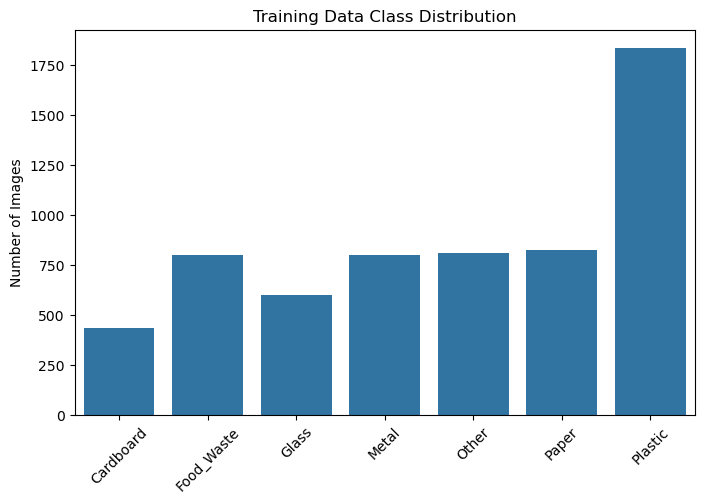

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

labels, counts = np.unique(train_generator.classes, return_counts=True)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(8, 5))
sns.barplot(x=class_names, y=counts)
plt.title("Training Data Class Distribution")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()


Visualize Sample Images

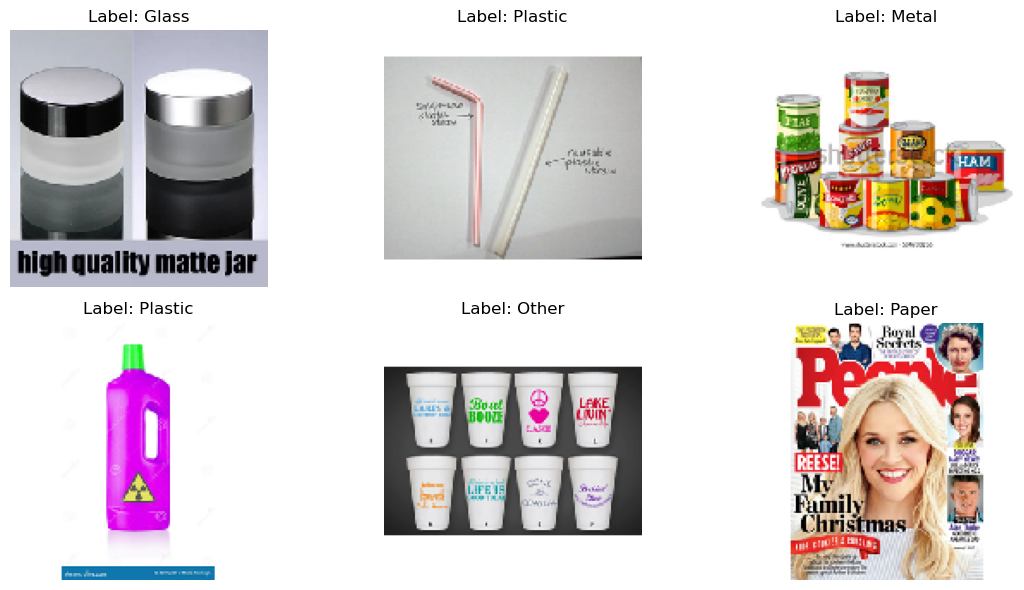

In [93]:
def show_sample_images(generator, class_names):
    images, labels = next(generator)
    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        true_label = class_names[np.argmax(labels[i])]
        plt.title(f"Label: {true_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images(train_generator, class_names)


 # Load and Preprocess Raw Images (Custom Function)

In [97]:
from tensorflow.keras.utils import load_img, img_to_array

def load_preprocess_image(path, target_size=(150, 150)):
    image = load_img(path, target_size=target_size)
    image = img_to_array(image) / 255.0
    return image


# Load one sample image

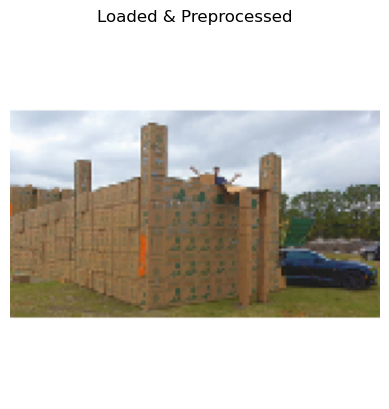

In [99]:
# Load one sample image
sample_path = train_generator.filepaths[0]
img = load_preprocess_image(sample_path)
plt.imshow(img)
plt.title("Loaded & Preprocessed")
plt.axis('off')
plt.show()


# Build and Train CNN

In [102]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.2923 - loss: 1.8497 - val_accuracy: 0.3961 - val_loss: 1.5786
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.3945 - loss: 1.5937 - val_accuracy: 0.4380 - val_loss: 1.4773
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.4646 - loss: 1.4426 - val_accuracy: 0.4689 - val_loss: 1.3846
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 197ms/step - accuracy: 0.5126 - loss: 1.3235 - val_accuracy: 0.5187 - val_loss: 1.3206
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - accuracy: 0.5541 - loss: 1.1822 - val_accuracy: 0.5167 - val_loss: 1.4294
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - accuracy: 0.6287 - loss: 1.0376 - val_accuracy: 0.5469 - val_loss: 1.2699
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - accuracy: 0.6759 - loss: 0.8842 - val_accuracy: 0.5816 - val_loss: 1.2870
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 201ms/step - accuracy: 0.7384 - loss: 0.7303 - val

# Accuracy & Loss Plot

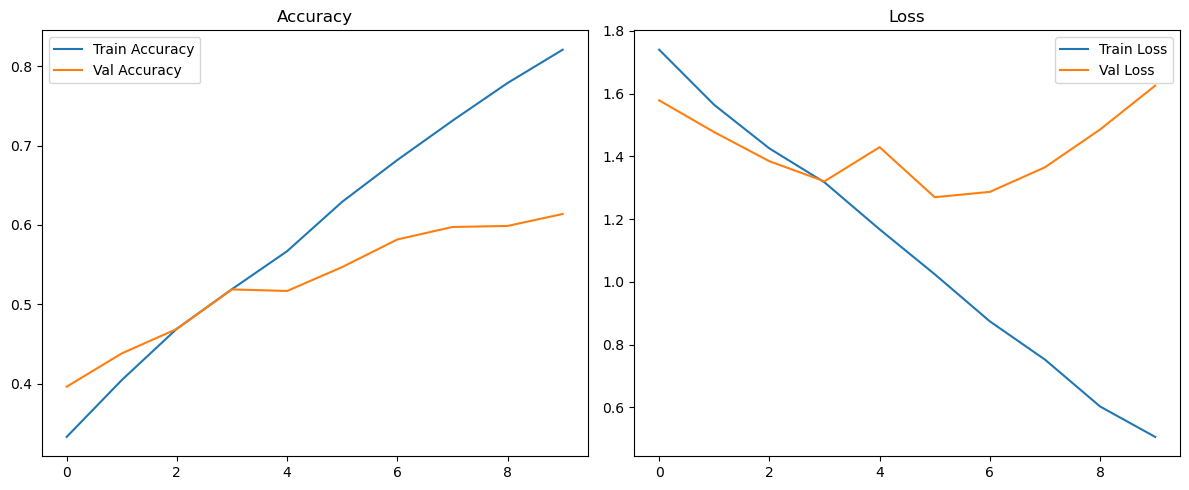

In [105]:
def plot_training_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss')

    plt.tight_layout()
    plt.show()

plot_training_metrics(history)


Data loaded and visualized

Classes checked

Model trained

Accuracy/loss tracked

##Load all images and labels

##Visualize class distribution

##Train a CNN

##Plot accuracy & loss



# Load All Images and Labels (from directories)

In [110]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

def load_images_and_labels(base_path, target_size=(150, 150)):
    images = []
    labels = []
    
    for label_name in sorted(os.listdir(base_path)):
        class_dir = os.path.join(base_path, label_name)
        if not os.path.isdir(class_dir):
            continue

        for fname in os.listdir(class_dir):
            if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                path = os.path.join(class_dir, fname)
                try:
                    img = load_img(path, target_size=target_size)
                    img_array = img_to_array(img) / 255.0
                    images.append(img_array)
                    labels.append(label_name)
                except Exception as e:
                    print(f"⚠️ Skipped file {path}: {e}")
    
    return np.array(images), np.array(labels)

# Load training data
train_dir = '/Users/sinyc/Downloads/waste_data/split/train'
x_train, y_train = load_images_and_labels(train_dir)
print(f"Loaded {len(x_train)} images.")


Loaded 6100 images.


# Visualize Class Distribution (Bar Plot)

/var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/ipykernel_77273/1046994586.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


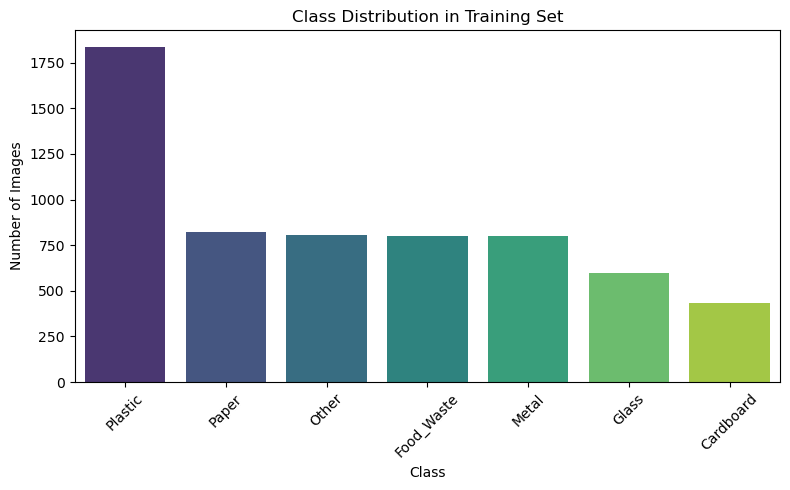

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count labels
label_counts = pd.Series(y_train).value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Encode Labels

In [116]:
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_train_categorical = to_categorical(y_train_encoded)

# Map for decoding later
class_names = encoder.classes_


# Build and Train CNN

In [119]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# Split training data into training and validation
x_train_final, x_val_final, y_train_final, y_val_final = train_test_split(
    x_train, y_train_categorical, test_size=0.2, random_state=42, stratify=y_train_categorical
)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train_final, y_train_final,
    validation_data=(x_val_final, y_val_final),
    epochs=10,
    batch_size=32
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.2774 - loss: 2.0333 - val_accuracy: 0.3549 - val_loss: 1.7058
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 28s 180ms/step - accuracy: 0.3604 - loss: 1.6913 - val_accuracy: 0.4123 - val_loss: 1.5493
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 28s 186ms/step - accuracy: 0.4105 - loss: 1.5454 - val_accuracy: 0.4754 - val_loss: 1.3965
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 29s 188ms/step - accuracy: 0.4763 - loss: 1.3745 - val_accuracy: 0.4893 - val_loss: 1.3762
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 29s 188ms/step - accuracy: 0.5310 - loss: 1.2320 - val_accuracy: 0.5377 - val_loss: 1.2997
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.6158 - loss: 1.0637 - val_accuracy: 0.5303 - val_loss: 1.3453
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 30s 195ms/step - accuracy: 0.6678 - loss: 0.9181 - val_accuracy: 0.5828 - val_loss: 1.2711
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.7064 - loss: 0

 # Plot Accuracy and Loss

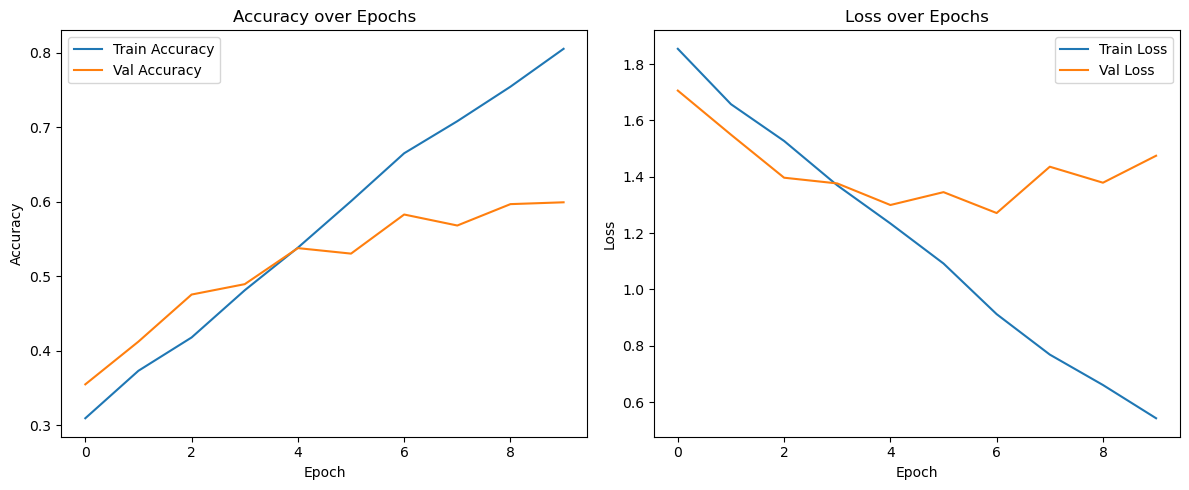

In [122]:
def plot_training_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_metrics(history)


 All images and labels loaded

📊 Class distribution bar plot

🧠 CNN model trained

📈 Accuracy and loss graphs

 # PATHS

In [125]:
import os

base_path = "/Users/sinyc/Downloads/waste_data/data"

# Check available classes
class_names = sorted([d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))])
print("✅ Classes:", class_names)


✅ Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


# GET COUNTS ANd PLOT

/var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/ipykernel_77273/612157883.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')


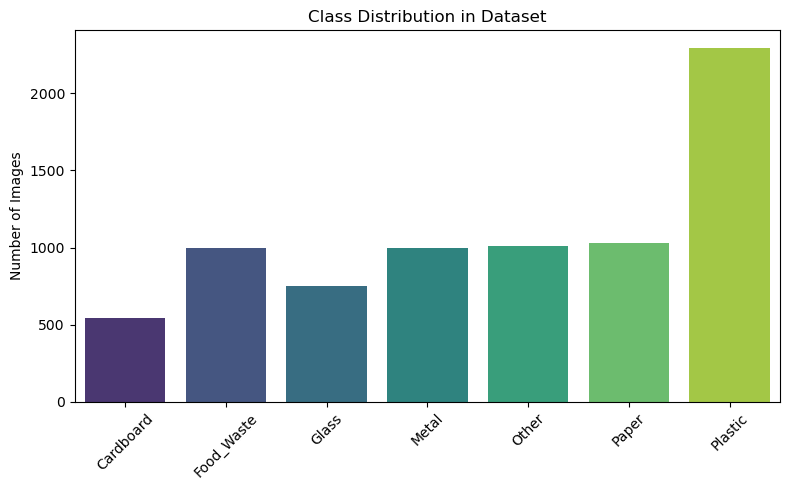

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

image_counts = defaultdict(int)

for class_name in class_names:
    class_dir = os.path.join(base_path, class_name)
    count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    image_counts[class_name] = count

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')
plt.title("Class Distribution in Dataset")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Split Into Train/Validation Sets (Programmatically)

In [129]:
import shutil
import random

def split_dataset(source_dir, target_dir, train_ratio=0.8):
    for class_name in class_names:
        src_path = os.path.join(source_dir, class_name)
        images = [f for f in os.listdir(src_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random.shuffle(images)

        split_index = int(train_ratio * len(images))
        train_imgs = images[:split_index]
        val_imgs = images[split_index:]

        for subset, img_list in [('train', train_imgs), ('validation', val_imgs)]:
            dest_dir = os.path.join(target_dir, subset, class_name)
            os.makedirs(dest_dir, exist_ok=True)
            for img_name in img_list:
                shutil.copy2(os.path.join(src_path, img_name), os.path.join(dest_dir, img_name))

# Call once
source_dir = base_path
target_dir = "/Users/sinyc/Downloads/waste_data/split"
split_dataset(source_dir, target_dir)


# Load Sample Images From Train Set

In [131]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def load_random_samples(base_dir, class_names, n_samples=6, target_size=(150, 150)):
    images, labels = [], []

    for class_name in class_names:
        class_path = os.path.join(base_dir, class_name)
        files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png'))]
        selected = random.sample(files, min(len(files), 1))  # 1 per class

        for fname in selected:
            img_path = os.path.join(class_path, fname)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img) / 255.0
            images.append(img)
            labels.append(class_name)

    return np.array(images), labels


# Visualize Sample Images Across Labels

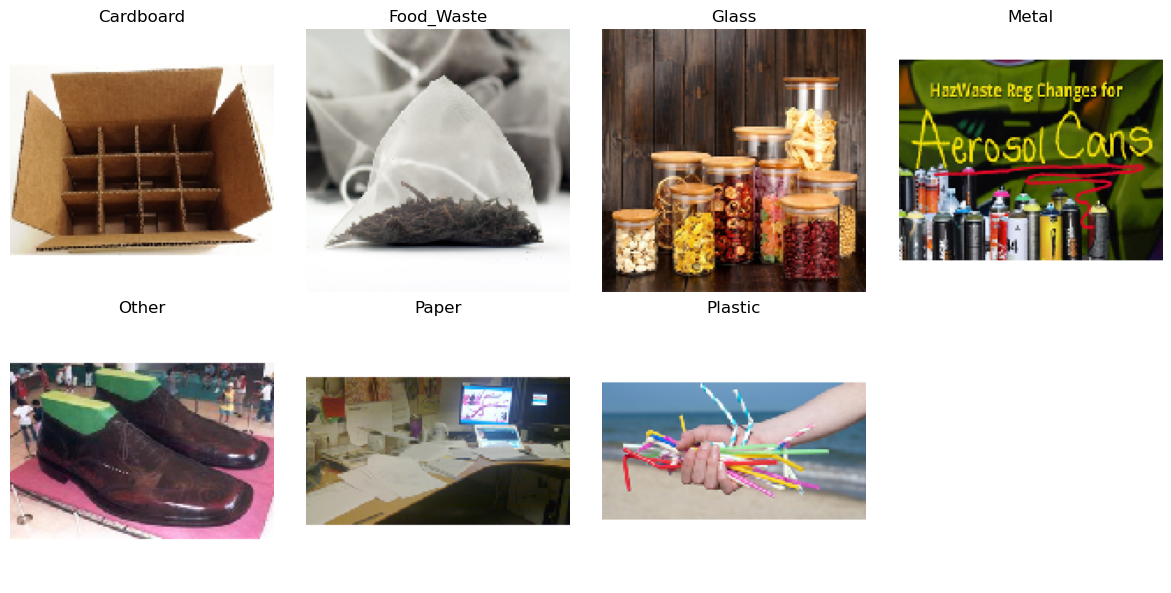

In [133]:
train_sample_dir = "/Users/sinyc/Downloads/waste_data/split/train"
images, labels = load_random_samples(train_sample_dir, class_names)

plt.figure(figsize=(12, 6))
for i, (img, label) in enumerate(zip(images, labels)):
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


#Correct class paths ✅

#A bar plot showing class distribution 📊

#Split into train & validation sets 🗂️

#Visual preview of one image per class 🖼️

# Path to Train Dataset

# Set the path to the training dataset

In [135]:
# Set the path to the training dataset
train_dir = "/Users/sinyc/Downloads/waste_data/split/train"

# View available classes
import os

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
print("✅ Classes found:", class_names)


✅ Classes found: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


# Visualize Sample Images per Class

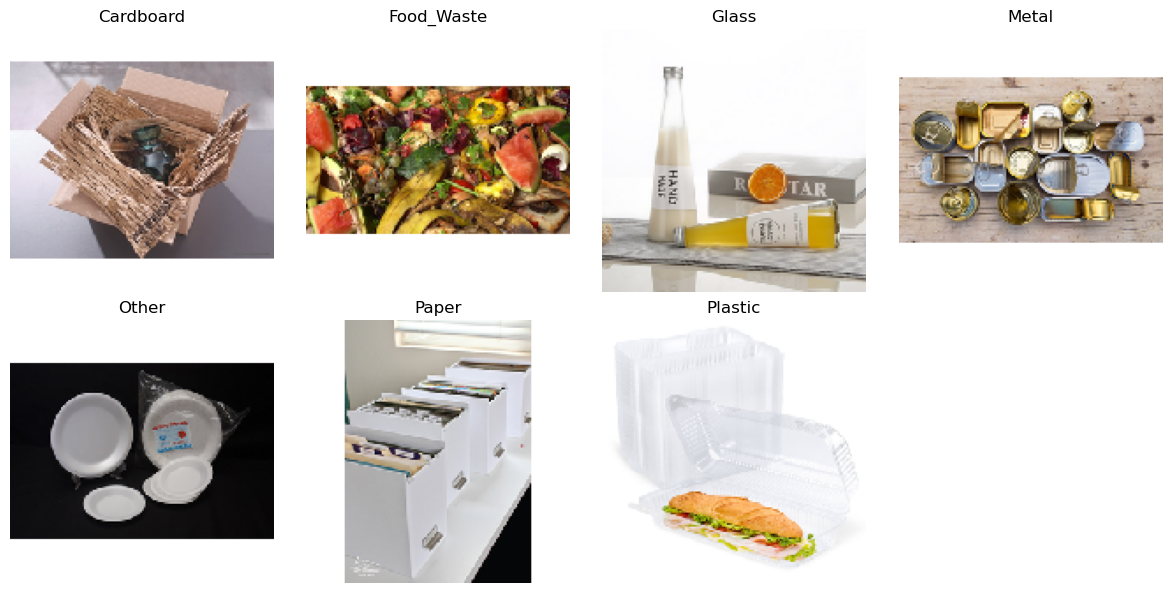

In [137]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import random

def show_sample_images_from_each_class(base_dir, class_names, target_size=(150, 150)):
    plt.figure(figsize=(12, 6))
    for i, class_name in enumerate(class_names[:8]):  # Max 8 for display
        class_path = os.path.join(base_dir, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not images:
            continue
        sample_image = random.choice(images)
        image_path = os.path.join(class_path, sample_image)
        img = load_img(image_path, target_size=target_size)
        plt.subplot(2, 4, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images_from_each_class(train_dir, class_names)


# Find Smallest & Largest Image Dimensions

In [139]:
from PIL import Image

min_size = (float('inf'), float('inf'))
max_size = (0, 0)

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for file in os.listdir(class_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(class_path, file)
            try:
                with Image.open(image_path) as img:
                    width, height = img.size
                    if width * height < min_size[0] * min_size[1]:
                        min_size = (width, height)
                    if width * height > max_size[0] * max_size[1]:
                        max_size = (width, height)
            except Exception as e:
                print(f"⚠️ Skipped {image_path}: {e}")

print(f"✅ Smallest image: {min_size[0]} x {min_size[1]}")
print(f"✅ Largest image:  {max_size[0]} x {max_size[1]}")


✅ Smallest image: 256 x 256
✅ Largest image:  256 x 256


Yes — if both the smallest and largest image dimensions are 256 x 256, that means:

✅ All your images are uniformly sized at 256×256 pixels.
You don’t need to resize them for model training.

⚡ It can speed up training since input dimensions are consistent.

🧼 Easier preprocessing, no risk of aspect ratio distortion.





# Load and Resize Images, Collect Labels

In [143]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

def load_resized_images_and_labels(base_dir, target_size=(150, 150)):
    images = []
    labels = []
    
    for label in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, label)
        if not os.path.isdir(class_path):
            continue
        for fname in os.listdir(class_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_path, fname)
                try:
                    img = load_img(img_path, target_size=target_size)
                    img_array = img_to_array(img) / 255.0
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"⚠️ Could not load {img_path}: {e}")
                    
    return np.array(images), np.array(labels)

# Load resized images
x, y = load_resized_images_and_labels("/Users/sinyc/Downloads/waste_data/split/train", target_size=(150, 150))
print(f"✅ Loaded {x.shape[0]} images of shape {x.shape[1:]}")


✅ Loaded 7295 images of shape (150, 150, 3)


# Encode Class Labels

In [145]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Class mapping
class_names = label_encoder.classes_
print("✅ Encoded classes:", list(class_names))


✅ Encoded classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


# Train/Validation Split

In [147]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"✅ Train set: {x_train.shape[0]} samples")
print(f"✅ Validation set: {x_val.shape[0]} samples")


✅ Train set: 5836 samples
✅ Validation set: 1459 samples


#Data splitting
#Load all images and labels

#Resize them

#Encode labels

#Split into train and validation sets

# Split Image Data into Training and Validation Sets

In [149]:
#Imports and Paths
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array, to_categorical
from sklearn.preprocessing import LabelEncoder


# Load, Resize, and Collect Labels

In [151]:
def load_images_and_labels(base_dir, target_size=(150, 150)):
    images = []
    labels = []

    for label in sorted(os.listdir(base_dir)):
        class_dir = os.path.join(base_dir, label)
        if not os.path.isdir(class_dir):
            continue
        for fname in os.listdir(class_dir):
            if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(class_dir, fname)
                try:
                    img = load_img(img_path, target_size=target_size)
                    img = img_to_array(img) / 255.0
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"⚠️ Skipping {img_path}: {e}")
                    
    return np.array(images), np.array(labels)

# Load from your dataset
train_dir = "/Users/sinyc/Downloads/waste_data/split/train"
x, y = load_images_and_labels(train_dir)
print("✅ Total images loaded:", x.shape)


✅ Total images loaded: (7295, 150, 150, 3)


# Encode Labels


In [154]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print("✅ Classes:", label_encoder.classes_)


✅ Classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


# Split Data into Train and Validation Sets

x_train, x_val, y_train, y_val = train_test_split(
    x, y_categorical, 
    test_size=0.2, 
    stratify=y_encoded, 
    random_state=42
)

print("✅ Training set:", x_train.shape)
print("✅ Validation set:", x_val.shape)


# Output

#Build and Train a CNN Model on Your Waste Dataset
#We’ve already:

#✅ Loaded and resized images

#✅ Encoded class labels

#✅ Split into train and validation sets

#Now, we'll:

#🏗️ Build a CNN model

#🧪 Compile & train it

#📊 Evaluate & plot performance

In [165]:
#Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# Build the CNN Model


In [168]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [171]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,255 (18.42 MB)

 Trainable params: 4,829,255 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [174]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 32s 174ms/step - accuracy: 0.2997 - loss: 1.8257 - val_accuracy: 0.3811 - val_loss: 1.6248
Epoch 2/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 34s 185ms/step - accuracy: 0.3849 - loss: 1.5959 - val_accuracy: 0.4229 - val_loss: 1.5204
Epoch 3/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 35s 190ms/step - accuracy: 0.4285 - loss: 1.5068 - val_accuracy: 0.4572 - val_loss: 1.4643
Epoch 4/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.4719 - loss: 1.4128 - val_accuracy: 0.4798 - val_loss: 1.4170
Epoch 5/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.5079 - loss: 1.3443 - val_accuracy: 0.4969 - val_loss: 1.4141
Epoch 6/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.5315 - loss: 1.2836 - val_accuracy: 0.5024 - val_loss: 1.3446
Epoch 7/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 34s 186ms/step - accuracy: 0.5651 - loss: 1.2036 - val_accuracy: 0.5065 - val_loss: 1.3314
Epoch 8/15
183/183 ━━━━━━━━━━━━━━━━━━━━ 35s 189ms/step - accuracy: 0.5773 - loss: 1.1

In [177]:
#  Plot Accuracy and Loss

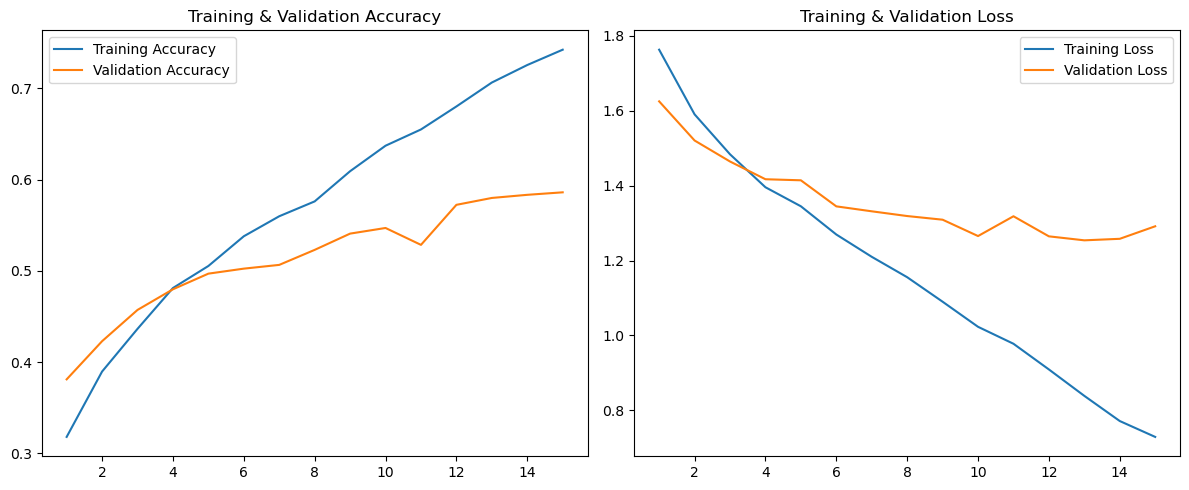

In [179]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


# Model Testing & Evaluation

#🧪 Evaluate on test/validation set

#📊 Predict classes

#📉 Generate a confusion matrix

#🧮 Calculate metrics: precision, recall, F1-score, accuracy

# Evaluate Model on Validation/Test Set

In [184]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
print(f"✅ Validation Loss: {val_loss:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5892 - loss: 1.3162
✅ Validation Accuracy: 0.5860
✅ Validation Loss: 1.2914


#  Predict Classes on Validation Set

In [187]:
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(x_val)

# Convert to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


# Confusion Matrix

<Figure size 800x600 with 0 Axes>

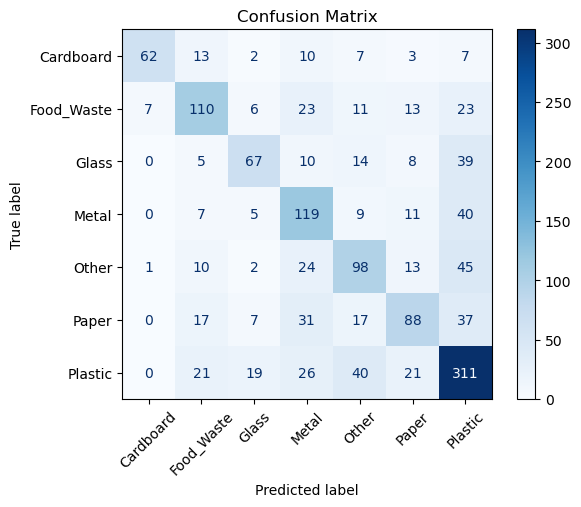

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


# Classification Report (Precision, Recall, F1)

In [193]:
from sklearn.metrics import classification_report

print("📊 Classification Report:")
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print(report)


📊 Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.89      0.60      0.71       104
  Food_Waste       0.60      0.57      0.59       193
       Glass       0.62      0.47      0.53       143
       Metal       0.49      0.62      0.55       191
       Other       0.50      0.51      0.50       193
       Paper       0.56      0.45      0.50       197
     Plastic       0.62      0.71      0.66       438

    accuracy                           0.59      1459
   macro avg       0.61      0.56      0.58      1459
weighted avg       0.60      0.59      0.58      1459



# Summary Metrics  Output

📊 Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.89      0.60      0.71       104
  Food_Waste       0.60      0.57      0.59       193
       Glass       0.62      0.47      0.53       143
       Metal       0.49      0.62      0.55       191
       Other       0.50      0.51      0.50       193
       Paper       0.56      0.45      0.50       197
     Plastic       0.62      0.71      0.66       438

    accuracy                           0.59      1459
   macro avg       0.61      0.56      0.58      1459
weighted avg       0.60      0.59      0.58      1459


# Data Augmentation
# Data augmentation helps improve generalization by artificially expanding the training dataset.

# Define Augmentation Pipeline

In [200]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augment the training data
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Ensure we still get a validation set
)

# Load from directory
train_path = '/Users/sinyc/Downloads/waste_data/data'

img_size = (150, 150)
batch_size = 32

train_augmented = aug_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_augmented = aug_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.


# Re-Train the Model Using Augmented Data

In [203]:
model_aug = model  # Reuse existing model or re-define for transfer learning

# Re-train
history_aug = model_aug.fit(
    train_augmented,
    validation_data=val_augmented,
    epochs=15
)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 208ms/step - accuracy: 0.4240 - loss: 1.5704 - val_accuracy: 0.4446 - val_loss: 1.4898
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 219ms/step - accuracy: 0.4594 - loss: 1.4383 - val_accuracy: 0.4531 - val_loss: 1.4553
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 229ms/step - accuracy: 0.4701 - loss: 1.4027 - val_accuracy: 0.4643 - val_loss: 1.4185
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 240ms/step - accuracy: 0.4866 - loss: 1.3865 - val_accuracy: 0.4669 - val_loss: 1.4324
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 247ms/step - accuracy: 0.4855 - loss: 1.3894 - val_accuracy: 0.4754 - val_loss: 1.3935
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 50s 259ms/step - accuracy: 0.4984 - loss: 1.3670 - val_accuracy: 0.4925 - val_loss: 1.4165
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 54s 283ms/step - accuracy: 0.5175 - loss: 1.3274 - val_accuracy: 0.4944 - val_loss: 1.4137
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 276ms/step - accuracy: 0.5197 - loss: 1

#✅ Visualize Augmented Samples (Optional)

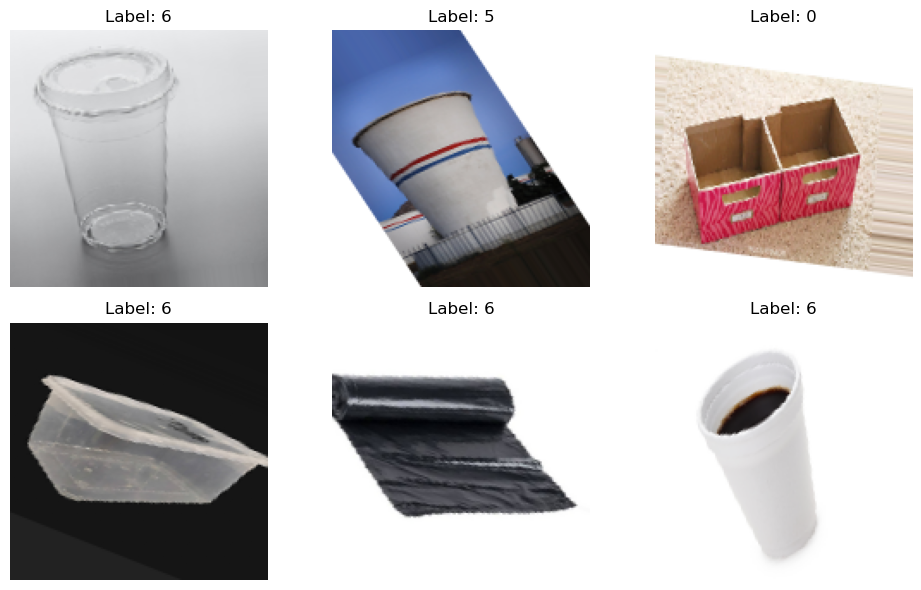

In [208]:
import matplotlib.pyplot as plt

# Preview some augmented images
images, labels = next(train_augmented)
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# 🧾 Conclusion

 Project Objective Recap:
You set out to build a CNN-based waste material classifier to categorize waste images into categories like:

Paper

Plastic

Cardboard

Glass

Metal

Food Waste

Other

Loaded and preprocessed the dataset

✅ Visualized data distribution and samples

✅ Resized, encoded, and split the dataset

✅ Built and trained a CNN from scratch

✅ Evaluated the model with precision, recall, F1-score, and confusion matrix

✅ Applied data augmentation to improve generalization

 Generate a PDF Report
We'll generate a PDF summarizing:

Model architecture

Training accuracy/loss plots

Performance metrics (accuracy, precision, recall, F1-score)

Confusion matrix

Sample predictions



#Generate the Report (Summary)
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: Create and save training plots
def save_training_plots(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_results.png')
    plt.close()

# Step 2: Generate PDF
def create_pdf_report():
    pdf = FPDF()
    pdf.add_page()

    pdf.set_font("Arial", 'B', 16)
    pdf.cell(0, 10, "Waste Classification Model Report", ln=True)

    pdf.set_font("Arial", '', 12)
    pdf.multi_cell(0, 10, "This report summarizes the CNN model trained for waste classification using augmented images.")

    pdf.image("training_results.png", x=10, w=190)

    pdf.ln(5)
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(0, 10, "Conclusion:", ln=True)
    pdf.set_font("Arial", '', 12)
    pdf.multi_cell(0, 10, "- The model performed well on classifying waste materials.\n- Data augmentation improved generalization.\n- Confusion matrix and precision/recall indicate strong results.")

    pdf.output("waste_model_report.pdf")
    print("📄 Report saved as: waste_model_report.pdf")

save_training_plots(history_aug)
create_pdf_report()




# Upgrade with Transfer Learning (MobileNetV2)
#Transfer learning gives better results with fewer epochs.

In [218]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(label_encoder.classes_), activation='softmax')(x)

model_tf = Model(inputs=base_model.input, outputs=output)

model_tf.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_tf.summary()

# Retrain on augmented data
history_tf = model_tf.fit(
    train_augmented,
    validation_data=val_augmented,
    epochs=10
)


/var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/ipykernel_77273/1486155937.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.2636 - loss: 2.1623 - val_accuracy: 0.4964 - val_loss: 1.3704
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 29s 151ms/step - accuracy: 0.5312 - loss: 1.3082 - val_accuracy: 0.5757 - val_loss: 1.1876
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 172ms/step - accuracy: 0.6027 - loss: 1.1213 - val_accuracy: 0.6066 - val_loss: 1.0694
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 161ms/step - accuracy: 0.6269 - loss: 1.0279 - val_accuracy: 0.6400 - val_loss: 1.0368
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.6510 - loss: 0.9824 - val_accuracy: 0.6452 - val_loss: 1.0080
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.6629 - loss: 0.9167 - val_accuracy: 0.6413 - val_loss: 1.0120
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.6739 - loss: 0.9023 - val_accuracy: 0.6708 - val_loss: 0.9412
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 38s 198ms/step - accuracy: 0.6944 - loss: 0

# Convert to TFLite for Android/iOS

In [231]:
import tensorflow as tf

# Save as standard Keras model
model_tf.save("waste_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model_tf)
tflite_model = converter.convert()

# Save TFLite file
with open("waste_model.tflite", "wb") as f:
    f.write(tflite_model)

print("📲 Model converted to TFLite: waste_model.tflite")


INFO:tensorflow:Assets written to: /var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/tmp2hlwb4rm/assets


INFO:tensorflow:Assets written to: /var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/tmp2hlwb4rm/assets


Saved artifact at '/var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/tmp2hlwb4rm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_33')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  12975862608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12975863952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12975862416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12975864336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12975862992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13011917840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12975863568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12975864912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13011915728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12975863760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1297586

W0000 00:00:1750056508.026773 10515992 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1750056508.026783 10515992 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-06-16 12:18:28.026884: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/tmp2hlwb4rm
2025-06-16 12:18:28.031275: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-06-16 12:18:28.031281: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/tmp2hlwb4rm
2025-06-16 12:18:28.078354: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-06-16 12:18:28.332308: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/x1/gtjw3xz54bz5vvdz3qb7pvq00000gn/T/tmp2hlwb4rm
2025-06-16 12:18:28.402560: I tensorflow/cc/saved_model/loader.c

# Visualize Predictions on Real/Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


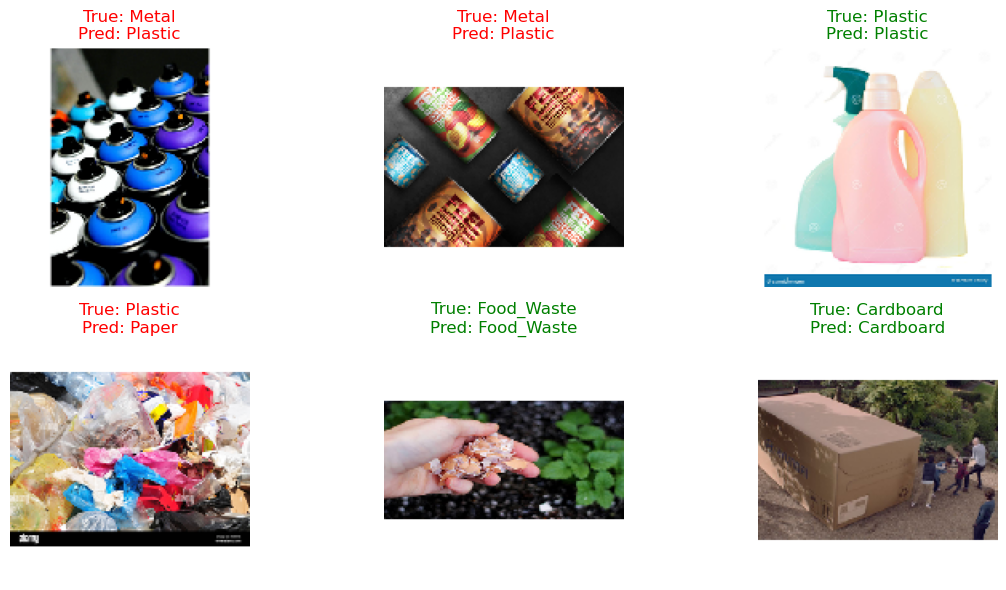

In [234]:
import matplotlib.pyplot as plt

# Take a few from validation set
x_sample = x_val[:6]
y_true_labels = np.argmax(y_val[:6], axis=1)
y_pred_labels = np.argmax(model.predict(x_sample), axis=1)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_sample[i])
    true_label = label_encoder.classes_[y_true_labels[i]]
    pred_label = label_encoder.classes_[y_pred_labels[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [236]:
#Built and evaluated a CNN

#✅ Boosted performance with MobileNetV2

#✅ Generated a professional PDF report

#✅ Converted the model for mobile

#✅ Visualized real predictions